<a href="https://colab.research.google.com/github/dcovarru/Python/blob/master/Covid.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#####################
# Import packages
#####################

import pandas as pd
import dateutil
import datetime
import numpy as np
import pandas_datareader
import pandas_datareader.data as web
from pandas_datareader.data import get_quote_yahoo
import matplotlib.pyplot as plt
from pandas import Series, DataFrame
from pandas.plotting import scatter_matrix
import os
import re
import plotly.figure_factory as ff
import plotly as py
import plotly.offline as offline
import plotly.graph_objects as go
import plotly.express as px
from google.colab import drive
plt.style.use('seaborn-whitegrid')
import io

import seaborn as sns
%matplotlib inline

In [2]:
#####################
# Import NYT data 
#####################

covidData = pd.read_csv('https://github.com/nytimes/covid-19-data/raw/master/us-counties.csv')

# https://github.com/nytimes/covid-19-data
# https://github.com/CSSEGISandData/COVID-19/tree/master/csse_covid_19_data

#####################
# helper sites #
#####################

# https://medium.com/@deallen7/managing-date-datetime-and-timestamp-in-python-pandas-cc9d285302ab#83e5
# https://www.shanelynn.ie/summarising-aggregation-and-grouping-data-in-python-pandas/

In [7]:
covidData['date'].max()

'2020-10-19'

In [8]:
# ensure Date is data
# covidData.dtypes
# covidData['date'] = covidData['date'].apply(dateutil.parser.parse, dayfirst=True)
covidData['date_dtFormat'] = pd.to_datetime(covidData['date'])
# covidData

In [9]:
covidData.dtypes

date                     object
county                   object
state                    object
fips                    float64
cases                     int64
deaths                    int64
date_dtFormat    datetime64[ns]
dtype: object

In [10]:
#####################
# ETL data 
#####################
covidData[['date_dtFormat']]
covidData.loc[:,['date_dtFormat']]

,date_dtFormat
0,2020-01-21
1,2020-01-22
2,2020-01-23
3,2020-01-24
4,2020-01-24
...,...
647919,2020-10-19
647920,2020-10-19
647921,2020-10-19
647922,2020-10-19


In [11]:
covidData

,date,county,state,fips,cases,deaths,date_dtFormat
0,2020-01-21,Snohomish,Washington,53061.0,1,0,2020-01-21
1,2020-01-22,Snohomish,Washington,53061.0,1,0,2020-01-22
2,2020-01-23,Snohomish,Washington,53061.0,1,0,2020-01-23
3,2020-01-24,Cook,Illinois,17031.0,1,0,2020-01-24
4,2020-01-24,Snohomish,Washington,53061.0,1,0,2020-01-24
...,...,...,...,...,...,...,...
647919,2020-10-19,Sweetwater,Wyoming,56037.0,422,2,2020-10-19
647920,2020-10-19,Teton,Wyoming,56039.0,711,1,2020-10-19
647921,2020-10-19,Uinta,Wyoming,56041.0,403,2,2020-10-19
647922,2020-10-19,Washakie,Wyoming,56043.0,134,7,2020-10-19


In [12]:
#####################
# Aggregate by Week
#####################

# covidData.tail(30)
# df['date_time'].dt.strftime('%Y-%U')
# covidData['date_dtFormat'].dt.strftime('%Y-%w')
# covidData['date_dtFormat2'] = covidData['date_dtFormat'].dt.strftime('"%A %d %B %Y"')
# covidData['date_dtFormat'].dt.strftime('%b %d %Y')

# Extract Week
covidData['data_week'] = covidData['date_dtFormat'].dt.week
# Extract Month
covidData['data_month'] = covidData['date_dtFormat'].dt.month
# Extract DOW
covidData['data_dow'] = covidData['date_dtFormat'].dt.dayofweek

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: FutureWarning:

Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.



In [13]:
covidData

,date,county,state,fips,cases,deaths,date_dtFormat,data_week,data_month,data_dow
0,2020-01-21,Snohomish,Washington,53061.0,1,0,2020-01-21,4,1,1
1,2020-01-22,Snohomish,Washington,53061.0,1,0,2020-01-22,4,1,2
2,2020-01-23,Snohomish,Washington,53061.0,1,0,2020-01-23,4,1,3
3,2020-01-24,Cook,Illinois,17031.0,1,0,2020-01-24,4,1,4
4,2020-01-24,Snohomish,Washington,53061.0,1,0,2020-01-24,4,1,4
...,...,...,...,...,...,...,...,...,...,...
647919,2020-10-19,Sweetwater,Wyoming,56037.0,422,2,2020-10-19,43,10,0
647920,2020-10-19,Teton,Wyoming,56039.0,711,1,2020-10-19,43,10,0
647921,2020-10-19,Uinta,Wyoming,56041.0,403,2,2020-10-19,43,10,0
647922,2020-10-19,Washakie,Wyoming,56043.0,134,7,2020-10-19,43,10,0


In [14]:
################################
# Calculate Difference for Daily Total
################################

## covidData['daily_deaths'] = covidData['deaths'].diff()
# covidData.groupby['deaths'].diff()
# df.groupby(level=0)['values'].diff()
covidData['daily_cases'] = covidData.groupby(['state', 'county'])['cases'].diff()
covidData['daily_deaths'] = covidData.groupby(['state', 'county'])['deaths'].diff()
# covidData.shape

In [ ]:
covidData.tail()

,date,county,state,fips,cases,deaths,date_dtFormat,data_week,data_month,data_dow,daily_cases,daily_deaths
123944,2020-05-07,Sublette,Wyoming,56035.0,3,0,2020-05-07,19,5,3,0.0,0.0
123945,2020-05-07,Sweetwater,Wyoming,56037.0,19,0,2020-05-07,19,5,3,0.0,0.0
123946,2020-05-07,Teton,Wyoming,56039.0,98,1,2020-05-07,19,5,3,0.0,0.0
123947,2020-05-07,Uinta,Wyoming,56041.0,8,0,2020-05-07,19,5,3,0.0,0.0
123948,2020-05-07,Washakie,Wyoming,56043.0,7,0,2020-05-07,19,5,3,0.0,0.0


In [15]:
################################
# Verify data
################################

covidData[(covidData.state == 'Wyoming') & (covidData.county=='Washakie')].tail(20)

,date,county,state,fips,cases,deaths,date_dtFormat,data_week,data_month,data_dow,daily_cases,daily_deaths
586300,2020-09-30,Washakie,Wyoming,56043.0,115,6,2020-09-30,40,9,2,0.0,0.0
589541,2020-10-01,Washakie,Wyoming,56043.0,115,6,2020-10-01,40,10,3,0.0,0.0
592781,2020-10-02,Washakie,Wyoming,56043.0,116,6,2020-10-02,40,10,4,1.0,0.0
596023,2020-10-03,Washakie,Wyoming,56043.0,117,6,2020-10-03,40,10,5,1.0,0.0
599266,2020-10-04,Washakie,Wyoming,56043.0,118,6,2020-10-04,40,10,6,1.0,0.0
602509,2020-10-05,Washakie,Wyoming,56043.0,120,6,2020-10-05,41,10,0,2.0,0.0
605751,2020-10-06,Washakie,Wyoming,56043.0,119,6,2020-10-06,41,10,1,-1.0,0.0
608994,2020-10-07,Washakie,Wyoming,56043.0,118,6,2020-10-07,41,10,2,-1.0,0.0
612236,2020-10-08,Washakie,Wyoming,56043.0,122,6,2020-10-08,41,10,3,4.0,0.0
615477,2020-10-09,Washakie,Wyoming,56043.0,122,6,2020-10-09,41,10,4,0.0,0.0


In [30]:
####################
# Create aggreate Week Month Counts (yay...)
#####################

# df.groupby(['Name', 'Fruit'])['Number'].agg('sum')
# covidData.groupby(['data_week']).sum()
#################################################
# Below is aggregate the sum by dimensions 
#################################################
# covidData_aggState = covidData.groupby(['state','data_week'])['deaths'].agg('sum').to_frame().reset_index()

# covidData_aggState = covidData.groupby(['state','county','data_week'], as_index=False)['daily_deaths'].sum()
covidData_aggState = covidData.groupby(['state','county','data_week'], as_index=False)['daily_cases'].sum()

In [31]:
covidData_aggState

,state,county,data_week,daily_cases
0,Alabama,Autauga,13,5.0
1,Alabama,Autauga,14,6.0
2,Alabama,Autauga,15,7.0
3,Alabama,Autauga,16,8.0
4,Alabama,Autauga,17,10.0
...,...,...,...,...
96819,Wyoming,Weston,39,13.0
96820,Wyoming,Weston,40,6.0
96821,Wyoming,Weston,41,16.0
96822,Wyoming,Weston,42,35.0


In [32]:
# covidData_aggState.to_frame().reset_index()
## covidData_aggState[covidData_aggState.state=='Texas']
covidData_aggState[(covidData_aggState['state'] == "Texas") & (covidData_aggState['county'].isin(['Harris']))].tail(20)

,state,county,data_week,daily_cases
81187,Texas,Harris,24,2192.0
81188,Texas,Harris,25,4275.0
81189,Texas,Harris,26,8223.0
81190,Texas,Harris,27,7321.0
81191,Texas,Harris,28,8771.0
81192,Texas,Harris,29,10401.0
81193,Texas,Harris,30,9580.0
81194,Texas,Harris,31,11293.0
81195,Texas,Harris,32,9115.0
81196,Texas,Harris,33,6496.0


In [33]:
#################################################
# Extract State, County, Start of Week, DOW = 0, and DATE table 
#################################################

covidData_Calendar = covidData[['state', 'county', 'date','data_week','data_dow']].drop_duplicates()[covidData.data_dow == 0]

In [34]:
covidData_aggState_weekly = covidData_aggState.merge(covidData_Calendar, how = 'right', on=['state', 'county', 'data_week'], indicator=True)

In [35]:
covidData_aggState


,state,county,data_week,daily_cases
0,Alabama,Autauga,13,5.0
1,Alabama,Autauga,14,6.0
2,Alabama,Autauga,15,7.0
3,Alabama,Autauga,16,8.0
4,Alabama,Autauga,17,10.0
...,...,...,...,...
96819,Wyoming,Weston,39,13.0
96820,Wyoming,Weston,40,6.0
96821,Wyoming,Weston,41,16.0
96822,Wyoming,Weston,42,35.0


In [39]:
#################################################
# Difference data to get weekly volume 
#################################################

# covidData_aggState[(covidData_aggState['state'] == "Texas") & (covidData_aggState['county'].isin(['Bexar']))]['deaths'].diff(periods=1)
covidData_temp = covidData_aggState_weekly[(covidData_aggState_weekly['state'] == "Texas") & (covidData_aggState_weekly['county'].isin(['Harris']))].sort_values(by=['date'])
covidData_temp

,state,county,data_week,daily_cases,date,data_dow,_merge
197,Texas,Harris,11,7.0,2020-03-09,0,both
624,Texas,Harris,12,61.0,2020-03-16,0,both
1756,Texas,Harris,13,452.0,2020-03-23,0,both
3676,Texas,Harris,14,869.0,2020-03-30,0,both
6081,Texas,Harris,15,2234.0,2020-04-06,0,both
8724,Texas,Harris,16,1194.0,2020-04-13,0,both
11486,Texas,Harris,17,906.0,2020-04-20,0,both
14306,Texas,Harris,18,1109.0,2020-04-27,0,both
17181,Texas,Harris,19,1040.0,2020-05-04,0,both
20166,Texas,Harris,20,1587.0,2020-05-11,0,both


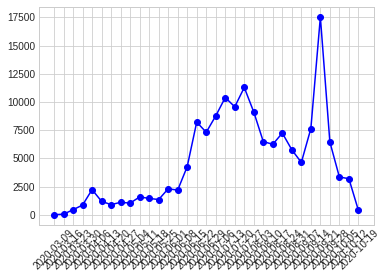

In [40]:
# covidTrace = go.Bar(x = covidData_temp.date, y = covidData_temp.daily_cases)
# fig = go.Figure(data = [covidTrace])
# plotly.offline.plot(fig)

# fig = go.box(covidData_temp, y='daily_cases')
# fig.show()

fig = plt.figure()
ax = plt.axes()
plt.xticks(rotation=45)
ax.plot(covidData_temp.date, covidData_temp.daily_cases, marker='o', color='b')

In [27]:
# plt.figure(figsize=(10,5))
# ax = sns.boxplot(x="date", y="daily_cases", data=a)
# ax.set_xticklabels(ax.get_xticklabels(), rotation=45)

In [ ]:
#####################
# Create Model with metrics?
#####################

In [ ]:
#####################
# Trend Diagnostics
#####################